In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



# analysis

In [2]:
datasetName = "/stor/public/hcad/lung_lung_Madissoon2019/lung_lung_Madissoon2019"

In [3]:
# Load the organized dataset
#system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
data.matrix <- Read10X(data.dir = "/home/chenyx/hca-d/lung/lung_lung_Madissoon2019_expression")

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [5]:
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

In [6]:
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")

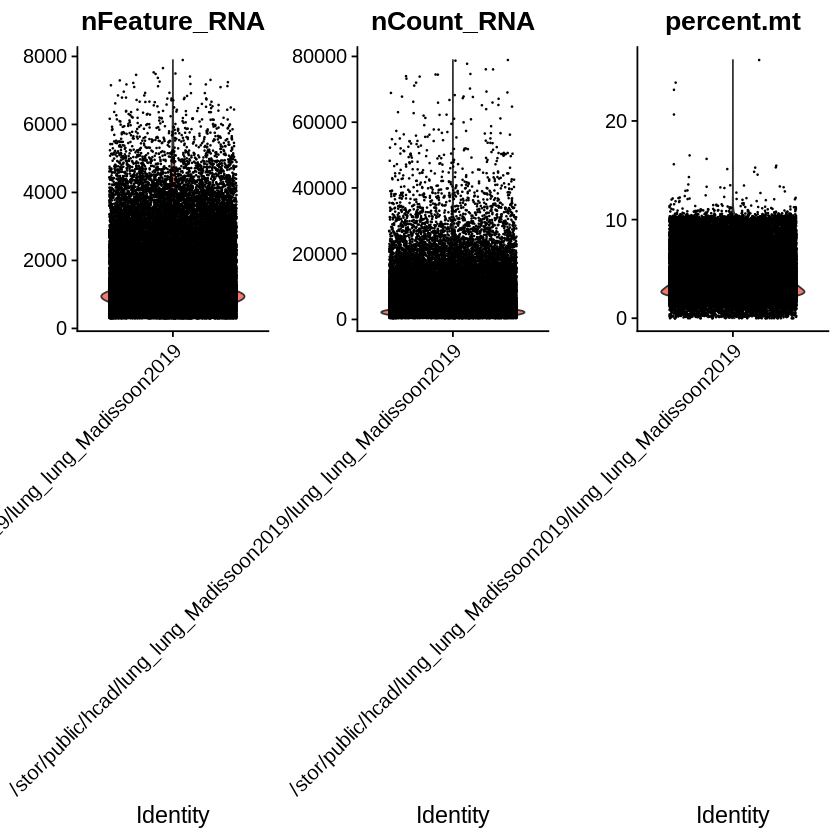

In [7]:
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0.1)

In [19]:
plot1 <- FeatureScatter(dataobj, feature1 = "nCount_RNA", feature2 = "percent.mt")+ NoLegend()
plot2 <- FeatureScatter(dataobj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")+ NoLegend()

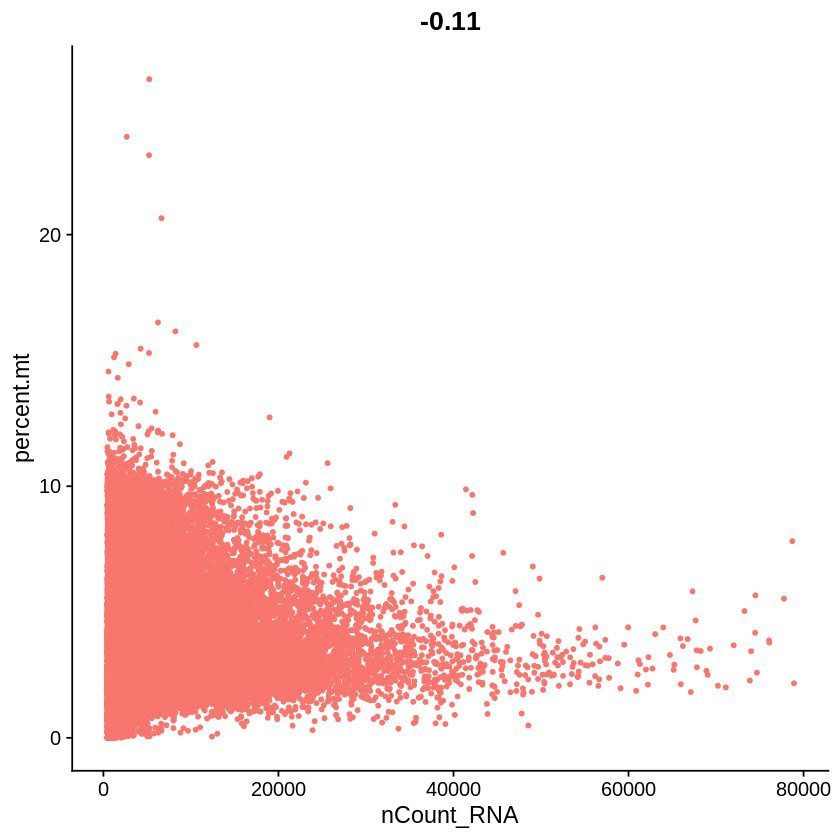

In [20]:
plot1

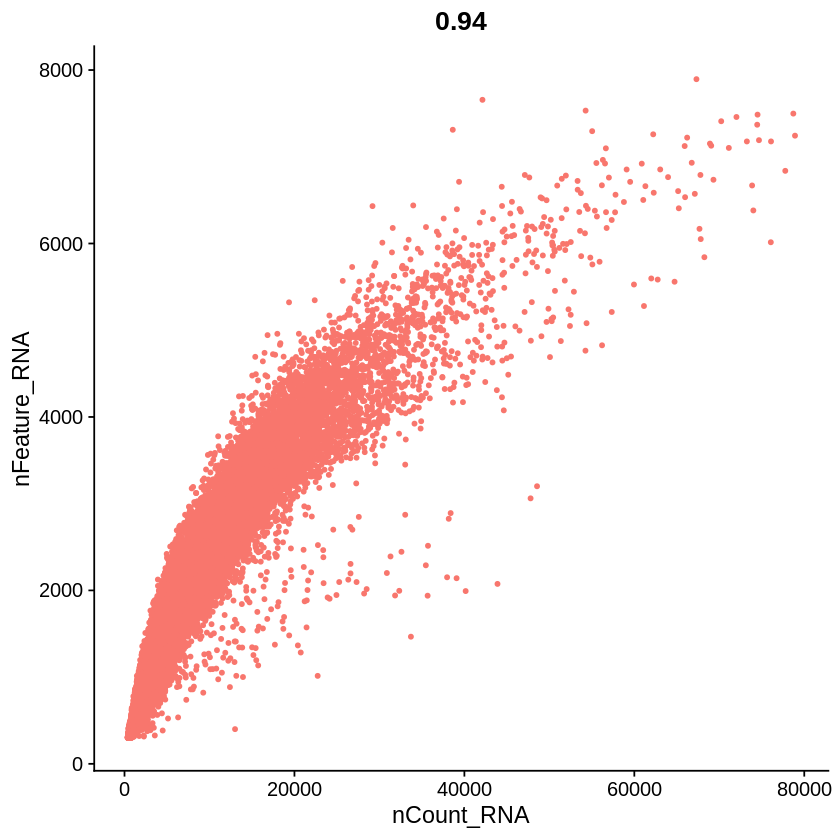

In [22]:
plot2

In [7]:
# Pre-processing
min.cells = 3
min.features = 300
nFeature_RNA_range = c(200, 5000)
percent.mt.thre = 10

In [8]:
#QC
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

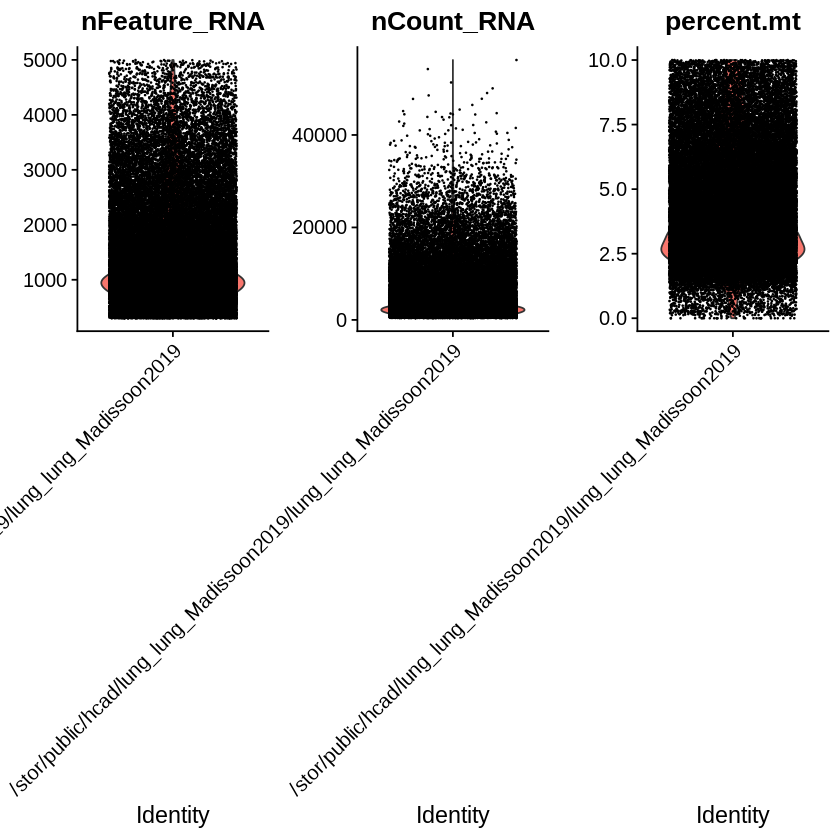

In [17]:
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0.1)+NoLegend()

In [9]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


PC_ 1 
Positive:  CD52, CCL4, TYROBP, FCER1G, GNLY, GZMB, CCL3, ALOX5AP, RGS1, LTB 
	   AREG, CCL4L2, CTSS, GZMH, IFNG, GPR183, BIRC3, LYZ, XCL2, BCL2A1 
	   CD83, AIF1, HOPX, TRDC, STXBP2, SPI1, XCL1, PIM2, JAML, HLA-DQB1 
Negative:  COL1A2, DCN, COL6A1, C1S, C1R, FBLN1, BGN, PLAC9, COL6A2, LUM 
	   COL1A1, COL3A1, MGP, PCOLCE, CALD1, SPARC, MMP2, FSTL1, NBL1, MFAP4 
	   RARRES2, CCDC80, SERPINF1, AEBP1, SPARCL1, MXRA8, SERPING1, IGFBP4, ADH1B, COL6A3 
PC_ 2 
Positive:  SLC34A2, MUC1, SFTA2, CXCL17, SFTPD, NAPSA, SFTPB, SLPI, WFDC2, SFTA3 
	   AGR2, SFTPA1, PIGR, SFTPA2, S100A14, FXYD3, DHCR24, ABCA3, LAMP3, SMIM22 
	   PEBP4, SFTPC, CYB5A, TMEM125, SDR16C5, ALPL, EPCAM, KRT8, MAL2, KRT18 
Negative:  VIM, LGALS1, TYROBP, FCER1G, CD52, TIMP1, AIF1, LYZ, PLAUR, CD68 
	   SPI1, BCL2A1, CSTA, IGSF6, ALOX5AP, MS4A6A, VCAN, CYBB, MNDA, OLR1 
	   MS4A7, CD14, IL1B, MRC1, IER3, CXCL8, FCGR2A, C1QA, NCF2, CFD 
PC_ 3 
Positive:  CD68, HLA-DRA, FTL, AIF1, C1QA, SPI1, HLA-DRB5, GRN, C1QC, CTSB 
	

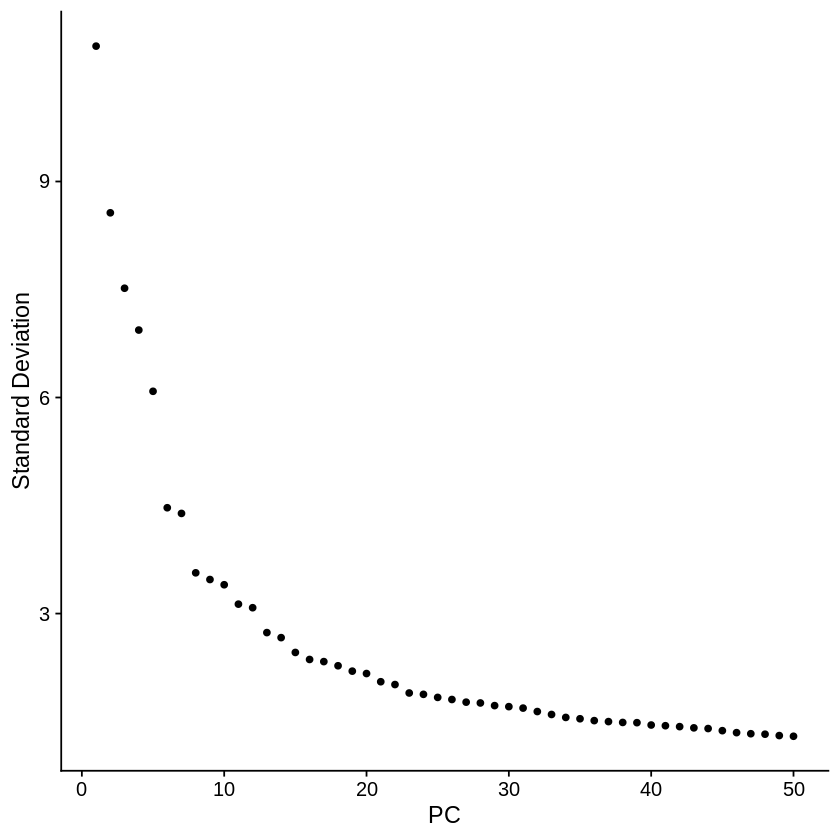

In [10]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
ElbowPlot(dataobj,50)

In [11]:
pcDim = 50
dataobj <- RunUMAP(dataobj, dims = 1:pcDim,n_neighbors=4)

Warning message:
“The following arguments are not used: n_neighbors”Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”17:13:05 UMAP embedding parameters a = 0.9922 b = 1.112
17:13:05 Read 55901 rows and found 50 numeric columns
17:13:05 Using Annoy for neighbor search, n_neighbors = 30
17:13:05 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
17:13:17 Writing NN index file to temp file /tmp/RtmpUZDkAh/file672d45a73672
17:13:17 Searching Annoy index using 1 thread, search_k = 3000
17:13:41 Annoy recall = 100%
17:13:42 Commencing smooth kNN distance calibration using 1 thread
17:13:45 Initializ

In [6]:
p_umap <- DimPlot(dataobj, reduction = "umap", group.by = 'cell_cluster', label = TRUE, pt.size=1)+ NoLegend()

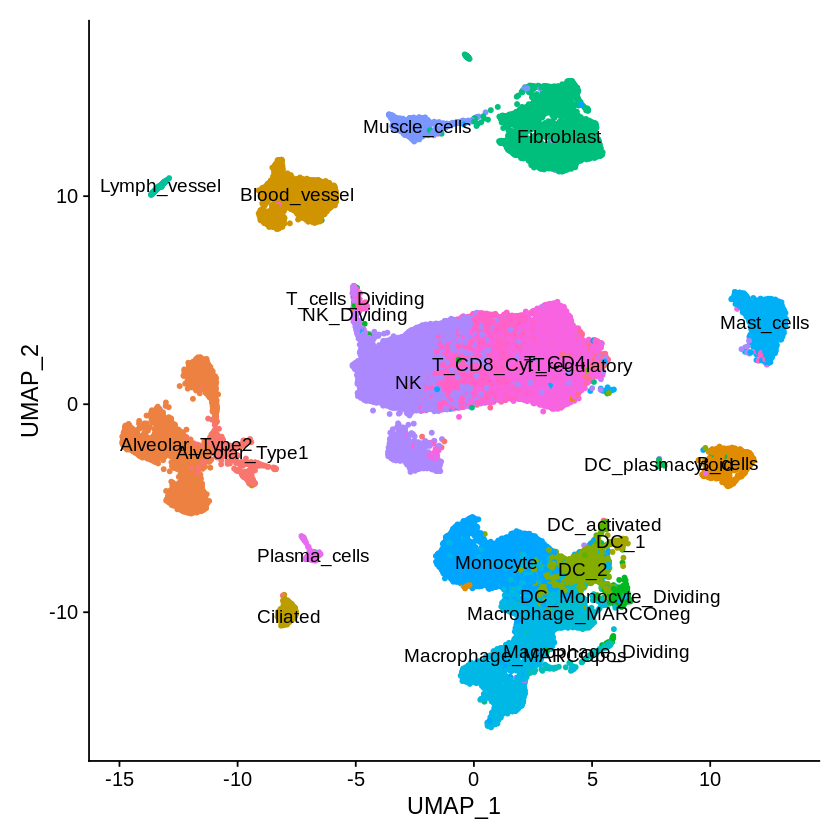

In [7]:
p_umap

In [14]:
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap, width = 8, height = 5)

In [18]:
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 55901
Number of edges: 2447018

Running Louvain algorithm...
Maximum modularity in 20 random starts: 0.9349
Number of communities: 29
Elapsed time: 37 seconds


1 singletons identified. 28 final clusters.


ARI 
0.594476

In [22]:
dataobj <- FindClusters(dataobj, resolution = 0.32, n.start = 20)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 55901
Number of edges: 2447018

Running Louvain algorithm...
Maximum modularity in 20 random starts: 0.9551
Number of communities: 23
Elapsed time: 36 seconds


1 singletons identified. 22 final clusters.


ARI 
0.6658347

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


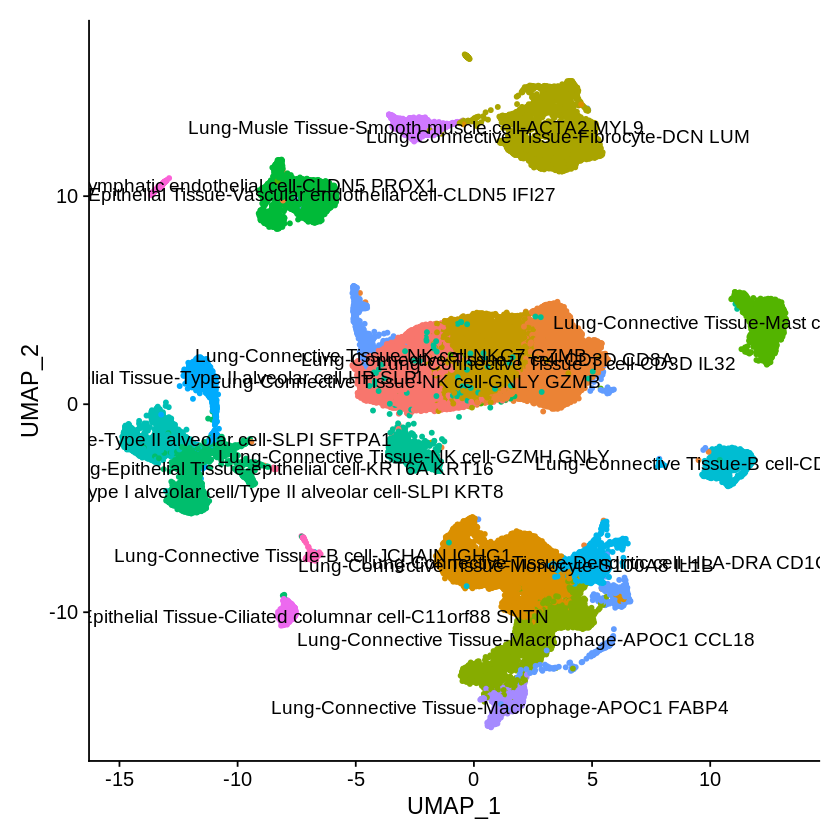

In [5]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)+ NoLegend()
p_umap2

In [6]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [25]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap2, width = 8, height = 5)

In [ ]:
# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17


In [27]:
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

# Annotation

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))
# Load marker file
dataobj.markers <- read.table(file = paste0(datasetName,".seurat.markers.txt"), h = T, sep = "\t")

In [9]:
table(dataobj@meta.data$cell_cluster)


      Alveolar_Type1       Alveolar_Type2              B_cells 
                 706                 4634                 1547 
        Blood_vessel             Ciliated                 DC_1 
                2575                  438                  163 
                DC_2         DC_activated DC_Monocyte_Dividing 
                1570                  121                  224 
     DC_plasmacytoid           Fibroblast         Lymph_vessel 
                  45                 4401                  311 
 Macrophage_Dividing  Macrophage_MARCOneg  Macrophage_MARCOpos 
                  89                  912                 4387 
          Mast_cells             Monocyte         Muscle_cells 
                2871                 5930                  815 
                  NK          NK_Dividing         Plasma_cells 
               10328                  129                  282 
               T_CD4           T_CD8_CytT     T_cells_Dividing 
                7159                 57

In [4]:
dataobj.markers[dataobj.markers['cluster']==0,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,0,2.595590,0.949,0.259,0,0,GNLY
2,0,2.372056,0.929,0.190,0,0,GZMB
3,0,2.216906,0.906,0.167,0,0,PRF1
4,0,2.169210,0.984,0.295,0,0,NKG7
5,0,1.937031,0.883,0.151,0,0,KLRD1
6,0,1.889481,0.670,0.084,0,0,FGFBP2
7,0,1.839089,0.699,0.159,0,0,SPON2
8,0,1.827055,0.676,0.057,0,0,KLRF1
9,0,1.798402,0.513,0.101,0,0,XCL2


In [60]:
dataobj.markers[dataobj.markers['gene']=="AQP4",]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
3448,0,0.8362414,0.492,0.048,0,8,AQP4
4255,0,0.8980478,0.709,0.046,0,10,AQP4
5501,0,1.0255153,0.856,0.049,0,13,AQP4


In [8]:
new.cluster.ids <- c('Lung-Connective Tissue-NK cell-GNLY GZMB',
                     'Lung-Connective Tissue-T cell-CD3D IL32',
                     'Lung-Connective Tissue-Monocyte-S100A8 IL1B',#??
                     'Lung-Connective Tissue-T cell-CD3D CD8A',
                     'Lung-Connective Tissue-Fibrocyte-DCN LUM',
                     'Lung-Connective Tissue-Macrophage-APOC1 CCL18',
                     'Lung-Connective Tissue-Mast cell-CPA3 TPSAB1',
                     'Lung-Epithelial Tissue-Vascular endothelial cell-CLDN5 IFI27',
                     'Lung-Epithelial Tissue-Type I alveolar cell/Type II alveolar cell-SLPI KRT8',
                     'Lung-Connective Tissue-NK cell-GZMH GNLY',
                     'Lung-Epithelial Tissue-Type II alveolar cell-SLPI SFTPA1',
                     'Lung-Connective Tissue-B cell-CD79A IGLC2',
                     'Lung-Connective Tissue-Dendritic cell-HLA-DRA CD1C',
                     'Lung-Epithelial Tissue-Type II alveolar cell-HP SLPI',
                     'Lung-Connective Tissue-NK cell-NKG7 GZMB',
                     'Lung-Connective Tissue-Macrophage-APOC1 FABP4',
                     'Lung-Musle Tissue-Smooth muscle cell-ACTA2 MYL9',
                     'Lung-Epithelial Tissue-Ciliated columnar cell-C11orf88 SNTN',
                     'Lung-Epithelial Tissue-Lymphatic endothelial cell-CLDN5 PROX1',
                     'Lung-Connective Tissue-B cell-JCHAIN IGHG1',
                     'Lung-Connective Tissue-Fibrocyte-DCN LUM',
                     'Lung-Epithelial Tissue-epithelial cell-KRT6A KRT16')

In [9]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 0.1) + NoLegend()

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

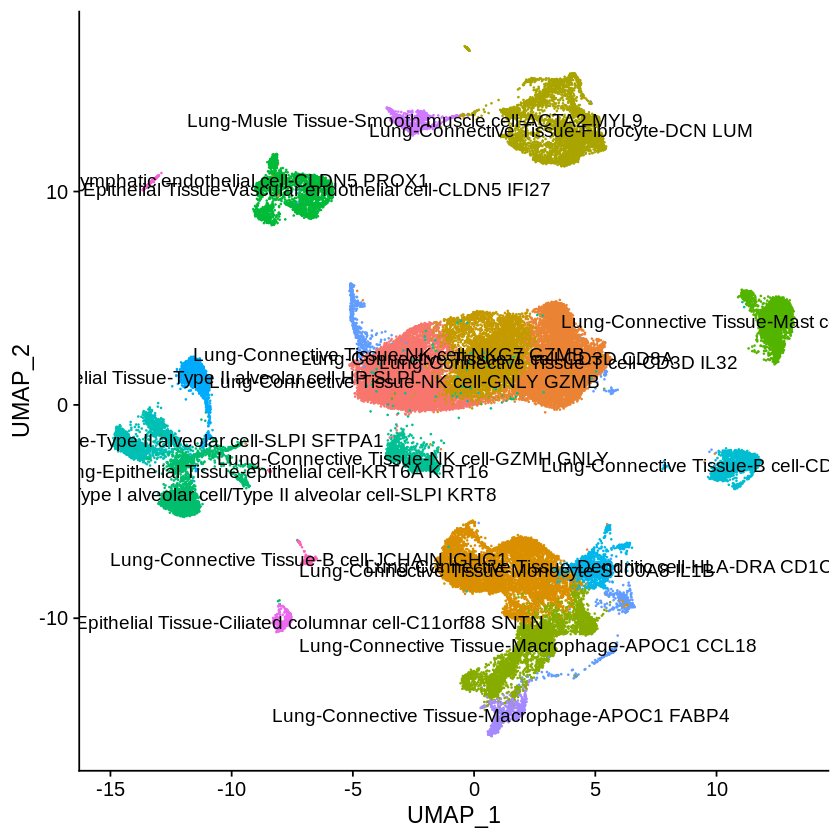

In [6]:
plot

In [7]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [10]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [11]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [12]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [13]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)